In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")

In [2]:
X = (pd.read_csv("Linear_X_Train.csv")).values
y = (pd.read_csv("Linear_Y_Train.csv")).values

mean = X.mean()
std = X.std()
X = (X-mean)/std

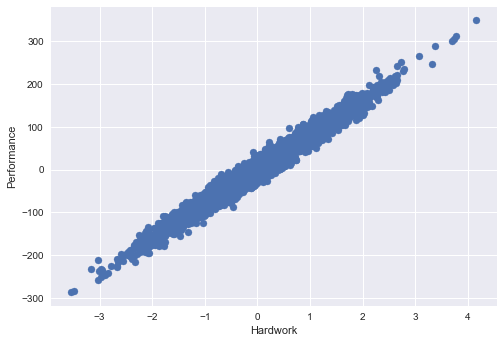

In [3]:
plt.scatter(X,y)
plt.ylabel("Performance")
plt.xlabel("Hardwork")
plt.show()

In [4]:
def hypothesis(x,theta):
    y_pred = theta[0]+theta[1]*x
    return y_pred

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_pred = hypothesis(X[i],theta)
        grad[0] += (y_pred - y[i])
        grad[1] += (y_pred - y[i]) * X[i]
    return grad/m

def gradient_descent(X,y,lr=0.1,max_steps=100):
    theta = np.zeros((2,))
    error_list=[]
    theta_list= []
    for i in range(max_steps):
        grad = gradient(X,y,theta)
        e = error(X,y,theta)
        error_list.append(e)
        theta[0]-=lr*grad[0]
        theta[1]-=lr*grad[1]
        theta_list.append((theta[0],theta[1]))
        
    return theta,error_list,theta_list

def error(X,y,theta):
    m = X.shape[0]
    total_error=0
    for i in range(m):
        y_pred = hypothesis(X[i],theta)
        total_error+=(y[i]-y_pred)**2
    return total_error/m

In [5]:
theta,error_list,theta_list = gradient_descent(X,y)

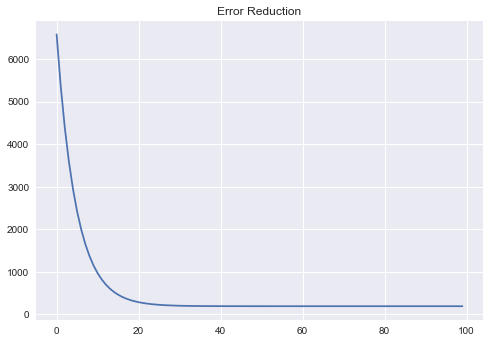

In [6]:
plt.plot(error_list)
plt.title("Error Reduction")
plt.show()

In [7]:
X_test = (pd.read_csv("Linear_X_Test.csv")).values

In [8]:
y_pred = hypothesis(X,theta)

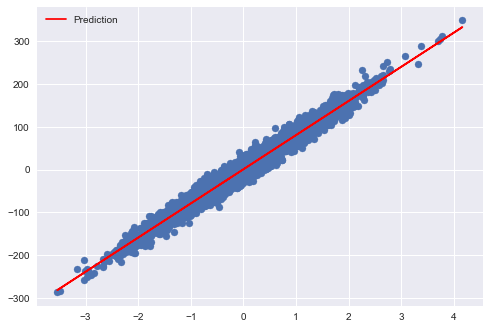

In [9]:
plt.scatter(X,y)
plt.plot(X,y_pred,c="red",label="Prediction")
plt.legend()

In [10]:
y_test_pred = hypothesis(X_test,theta)

In [11]:
df = pd.DataFrame(data=y_test_pred,columns=["y prediction"])

df.to_csv('prediction_y.csv',index=False)

# R2 Score

In [12]:
a = np.sum((y - y_pred)**2)
y_avg = y.mean()
b = np.sum((y-y_avg)**2)
R2_Score = (1-(a/b))*100

In [13]:
print(R2_Score)

97.09612226971643


In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

T0,T1 =np.meshgrid(T0,T1)

In [16]:
J = np.zeros(T0.shape)

In [17]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T1[i][j] * X + T0[i][j]
        J[i][j] = np.sum((y-y_pred)**2)/(y.shape[0])

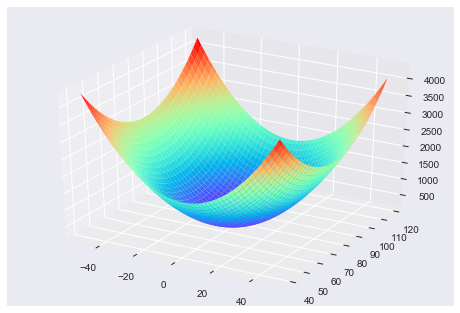

In [18]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap="rainbow")
plt.show()

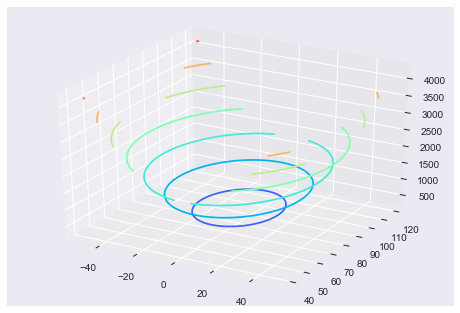

In [19]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap="rainbow")
plt.show()

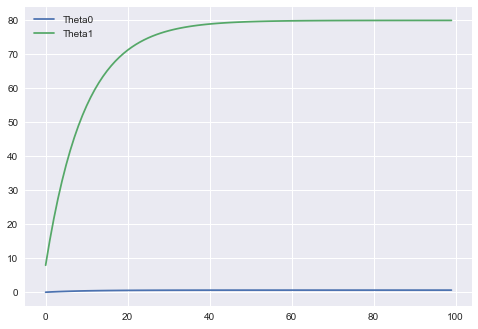

In [20]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

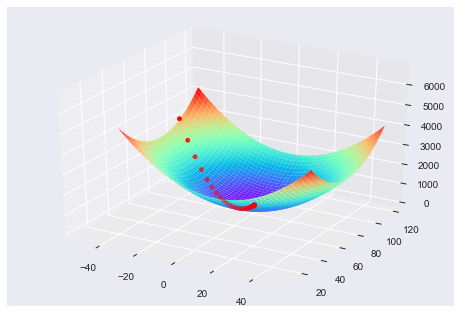

In [21]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.plot_surface(T0,T1,J,cmap="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c="red")
plt.show()

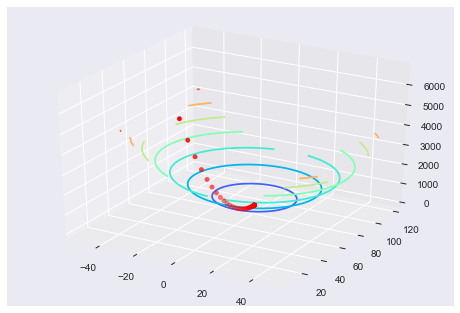

In [22]:
fig = plt.figure()
axes = fig.gca(projection="3d")
axes.contour(T0,T1,J,cmap="rainbow")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list,c="red")
plt.show()

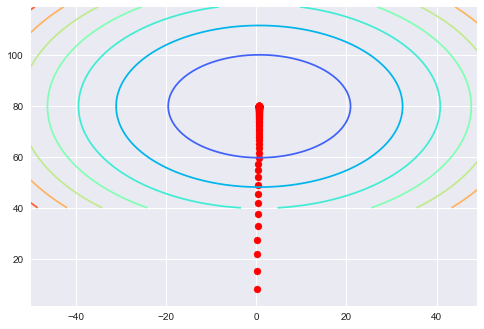

In [23]:
plt.contour(T0,T1,J,cmap="rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1],c="red")
plt.show()